In [1]:
# Library Modules

# Data Manipulation & Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Split
from sklearn.model_selection import train_test_split

# Data Preprocessor
from sklearn.compose import ColumnTransformer
## imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

# Feature Engineering
from imblearn.pipeline import Pipeline
## encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder
from category_encoders.binary import BinaryEncoder
## scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
## polynomial
from sklearn.preprocessing import PolynomialFeatures

# Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier # Random Forest
from xgboost import XGBClassifier # XGBoost
from lightgbm import LGBMClassifier #LightGBM
from catboost import CatBoostClassifier # CatBoost

# Resampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Hyperparameter Tuning
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Cross Validation
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score

# Scoring Matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, fbeta_score, make_scorer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score, auc
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Interpretation tools
import shap

# Warning Suppressions
import warnings
warnings.filterwarnings("ignore")

d:\pwdk\M3D10\imbalance_kelas\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# **Travel Insurance Claim Prediction**
*Capstone 3 Project - Kirana Shely Sefiana*

### **1. Business Understanding**

#### 1.1 Storyline
Asuransi perjalanan merupakan jenis asuransi yang memberikan perlindungan selama seseorang melakukan perjalanan, baik domestik ataupun internasional. Beberapa negara, seperti Eropa atau Amerika, mewajibkan turis nya memiliki asuransi perjalanan. Premi yang dibayarkan oleh nasabah biasanya bergantung dengan cakupan perlindungan, tujuan, dan jangka waktu wisata.

Perusahaan asuransi ingin mengetahui lebih awal mengenai siapa saja pemegang polis yang berpotensi mengajukan klaim. Informasi ini sangat penting supaya perusahaan dapat mengelola resiko, meningkatkan kualitas layanan, dan menyusun strategi yang tepat. Selain itu, perusahaan juga bisa menghindari adanya biaya cost yang besar dan dapat meningkatkan keuntungan.



#### 1.2 Problem Statement
Perusahaan perlu mengetahui nasabah yang beresiko mengajukan klaim asuransi. Klaim yang diajukan nasabah dapat menimbulkan biaya bagi perusahaan. Maka dari itu, sangat penting untuk memprediksi potensi klaim nasabah supaya perusaan dapat mengalokasikan dana cadangan yang cukup, mengurangi kerugian, dan meningkatkan keuntungan.

#### 1.3 Goals
Tujuan utama dari proyek ini adalah membangun model prediksi untuk mengklasifikasikan apakah seorang nasabah akan mengajukan klaim atau tidak. Secara detail :
1. Mengidentifikasi faktor yang paling berpengaruh terhadap resiko klaim
2. Meningkatkan efektivitas pengelolaan resiko perusahaan
3. Memberikan dasar bagi pengambilan keputusan bisnis, biaya premi, dan strategi pemasaran

#### 1.4 Metric Evaluation
##### *Target Column*
- Column : `Claim`
- Value : `Yes(1) / No(0)`

Target prediksi merupakan colom `claim` yang menunjukan bahwa nasabah melakukan klaim atau tidak terhadap asuransi perjalanannya.


##### *Cost-Benefit Matrix*

| **Aktual / Prediksi**       | **Prediksi: Klaim (1)**                                                                                     | **Prediksi: Tidak Klaim (0)**                                                                  |
| --------------------------- | ----------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------- |
| **Aktual: Klaim (1)**       | **True Positive (TP)**<br>→ Klaim terdeteksi, perusahaan bisa antisipasi risiko.                            | **False Negative (FN)**<br>→ Klaim tidak terdeteksi, kerugian finansial besar bagi perusahaan. |
| **Aktual: Tidak Klaim (0)** | **False Positive (FP)**<br>→ Tidak ada klaim tapi diprediksi klaim, perusahaan mungkin overestimate risiko. | **True Negative (TN)**<br>→ Tidak ada klaim dan diprediksi tidak klaim, kondisi aman.          |

- *False Negative (FN)* atau Error Type-2 harus dihindari karena resiko perusahaan tidak bisa mengantisipasi kerugian klaim cukup tinggi.

- *False Positive (FP)* atau Error Type-1 resiko relatif tidak berbahaya, hanya menyebabkan peluang “kelebihan estimasi risiko”.

Data asuransi yang dimiliki kemungkinan besar merupakan data asuransi travel secara internasional. Kemungkinan untuk penjualannya dan pengajuan claim nya akan dalam bentuk USD Dollar. Untuk perhitungan kerugian dan keuntungan pada cost-benefit matrix, akan digunakan perkiraan berdasarkan data dari artikel Forbes.
- True Positive -> Claim sudah terantisipasi, cost sudah dialokasikan sehingga tidak ada cost yang harus dikeluarkan

    **Benefit/Cost = $0**
- False Negative -> Mengeluarkan cost untuk meng-cover claim asuransi nasabah, diasumsikan rata-rata biaya cover adalah 100% dari total biaya trip

    Jika biaya trip rata-rata = $5000

    **Cost = - $5000**
- False Positive -> Mengalokasikan cost untuk meng-cover claim asuransi pada nasabah dengan peluang claim tinggi, diasumsikan alokasi untuk biaya cover nasabah yang claim adalah 10% dari total biaya trip

    **Cost = - $500**
- True Negative -> Tidak perlu mengeluarkan biaya untuk cover asuransi, mendapat benefit dari premi asuransi nasabah. Rata-rata harga asuransi diasumsikan 200 dollar untuk harga trip seharga 5000 dollar

    **Benefit/Cost = $200**

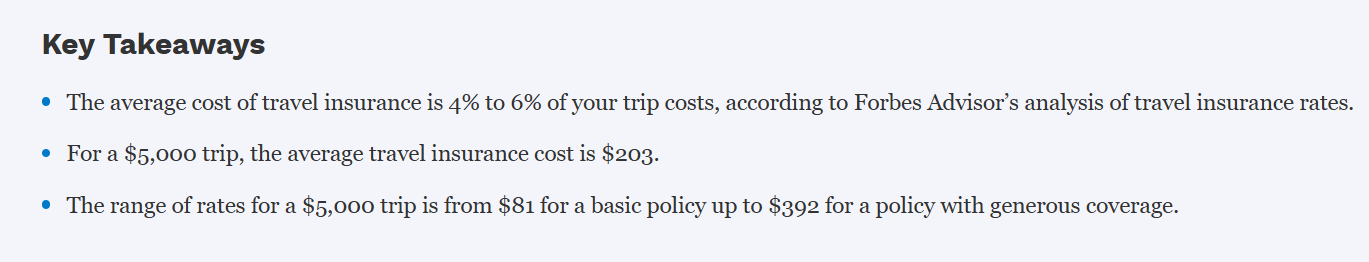

##### *Evaluation Metrics*
Terdapat beberapa pilihan metrik evaluasi yang dapat dipilih. *F2-Score* menjadi metrik pilihan utama karena dapat meminimalkan FN dan FP, dengan menitikberatkan *recall*/FN.

**F2-Score**

$$
Fβ​=(1+β^2)⋅\frac{Precision⋅Recall}{(β^2⋅Precision)+Recall​}
$$
β = 2 → recall dianggap 4x lebih penting daripada precision.

---
Metrik lain yang akan diperhatikan:

*Precision* mungkin perlu diperhatikan juga untuk meminimalisir prediksi yang FP.
1. **Precision**

$$
Precision = \frac{TP}{TP + FP}
$$


*Recall* juga perlu diperhatikan untuk meminimalisir prediksi FN.

2. **Recall (Sensitivity / TPR)**

$$
Recall = \frac{TP}{TP + FN} 
$$

### **2. Data Understanding**

#### 2.1 General Information

In [2]:
# Read Data
df = pd.read_csv("data_travel_insurance.csv")
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


##### *Data Dictionary*
| **Nama Kolom**        | **Deskripsi**                                              |
| --------------------- | ---------------------------------------------------------- |
| Agency                | Nama agen asuransi.                                        |
| Agency Type           | Jenis agen asuransi perjalanan.                            |
| Distribution Channel  | Saluran distribusi agen asuransi perjalanan.               |
| Product Name          | Nama produk asuransi perjalanan.                           |
| Gender                | Jenis kelamin tertanggung (nasabah).                       |
| Duration              | Lama perjalanan (hari).                                    |
| Destination           | Tujuan perjalanan.                                         |
| Net Sales             | Jumlah penjualan polis asuransi perjalanan.                |
| Commision (in value) | Nilai komisi yang diterima agen asuransi perjalanan.       |
| Age                   | Usia tertanggung (nasabah).                                |
| Claim                 | Status klaim (apakah nasabah mengajukan klaim atau tidak). |


#### 2.2 Data Summary

In [3]:
row, column = df.shape
print(f"Keadaan data saat ini memiliki {row} baris dan {column} kolom")

Keadaan data saat ini memiliki 44328 baris dan 11 kolom


##### *Statistical Summary*

In [4]:
# Kondisi data numerik
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [5]:
# Kondisi data kategori
df.describe(include="object")

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Destination,Claim
count,44328,44328,44328,44328,12681,44328,44328
unique,16,2,2,26,2,138,2
top,EPX,Travel Agency,Online,Cancellation Plan,M,SINGAPORE,No
freq,24656,32113,43572,12979,6504,9267,43651


#### *Findings*
- Pada kolom `Duration` terdapat nilai negatif, perlu diperiksa apakah value masuk akal atau tidak
- Pada kolom `Net Sales` terdapat nilai negatif, kemungkinan dikarenakan terdapat kerugian karena nasabah klaim
- Pada kolom numerik lain perlu dilakukan pengecekan distribusi nilai dan outlier nya
- Pada kolom tipe kategori diperlukan transformasi value, terutama pada kolom target/`Claim`
- Pada kolom target/`Claim` terlihat memiliki ketidakseimbangan data karena *freq* untuk satu value sangat besar

### **3. Data Cleaning**

#### 3.1 Missing Values

In [6]:
# Pengecekan kolom yang kosong
df.isna().sum() / len(df) * 100

Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Gender                  71.392799
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision (in value)     0.000000
Age                      0.000000
Claim                    0.000000
dtype: float64

Kolom `Gender` memiliki value kosong dengan persentase lebih dari 70%. Dengan kolom yang memiliki banyak value kosong dapat menyulitkan proses prediksi klasifikasi berdasarkan jenis kelamin. Selain itu, dengan tidak adanya kolom ini dapat menghindari terjadinya diskriminasi gender. Maka dari itu, kolom ini akan dihapus.

In [7]:
# Hapus kolom gender secara permanen
df.drop(columns="Gender", inplace=True)

#### 3.2 Duplicated Values

In [8]:
# Pengecekan row yang duplikat
print(f"Jumlah row data duplikat adalah {df.duplicated().sum()} dari {len(df)} data")
print(f"Persentase duplikat sebanyak {df.duplicated().sum()/len(df)*100}%")

Jumlah row data duplikat adalah 5004 dari 44328 data
Persentase duplikat sebanyak 11.28857606930157%


Data duplikat memang mungkin terjadi, mengingat data ini tidak memiliki unique identifier sehingga mungkin saja terdapat value data yang kebetulan sama. Namun, data yang memiliki banyak duplikat dapat membuat model prediksi cenderung menjadi *overfitting* maka dari itu sebaiknya data duplikat ini lebih baik dihapus. Di sisi lain, sebelumnya sudah terlihat sekilas bahwa data target memiliki ketidakseimbangan. Jika ternyata di antara data yang duplikat ini terdapat banyak data minoritas, maka kondisi data akan semakin tidak seimbang.

In [9]:
# Pengecekan value data yang duplikat
df[df.duplicated()]["Claim"].value_counts()

Claim
No     5000
Yes       4
Name: count, dtype: int64

Value mayoritas terdapat pada value `No`, maka dari itu penghapusan kolom duplikat akan dilakukan pada row dengan value mayoritas saja. Row duplikat pada value `Yes` akan dibiarkan saja.

In [10]:
# Penghapusan kolom duplikat untuk value "Claim" = "No"
df = df[~((df["Claim"] == "No") & df.duplicated())]

In [11]:
df[df.duplicated()]
# Sisa data duplikat

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
9630,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.00,54.00,33,Yes
13044,C2B,Airlines,Online,Bronze Plan,5,SINGAPORE,17.55,4.39,32,Yes
32771,C2B,Airlines,Online,Bronze Plan,27,SINGAPORE,60.00,15.00,30,Yes
40071,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.00,54.00,39,Yes


Masih tersisa data yang duplikat dari kelompok value minoritas. Jika dilihat data yang duplikat ini juga masih terdapat perbedaan satu sama lain, sehingga jika dibiarkan pun tidak akan terlalu bermasalah. Kemudian nanti saat imbalance handling pun kemungkinan besar data ini akan di resampling karena data ini merupakan bagian dari minoritas.

#### 3.3 Checking Anomalies and Error

*EDA : Pengecekan Normalitas Distribusi Data Numerikal*

In [12]:
def EDA_boxplot(df, target, ncols=4):
    num_features = df.drop(columns=target).select_dtypes("number").columns
    nrows = int(np.ceil(len(num_features) / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows))
    axes = axes.flatten()

    for i, col in enumerate(num_features):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f"Kolom: {col}")

    for j in range(i+1, len(axes)):
        axes[j].axis("off")

    plt.suptitle("Boxplot pada Fitur Numerik", fontsize=14)
    plt.tight_layout()
    plt.show()

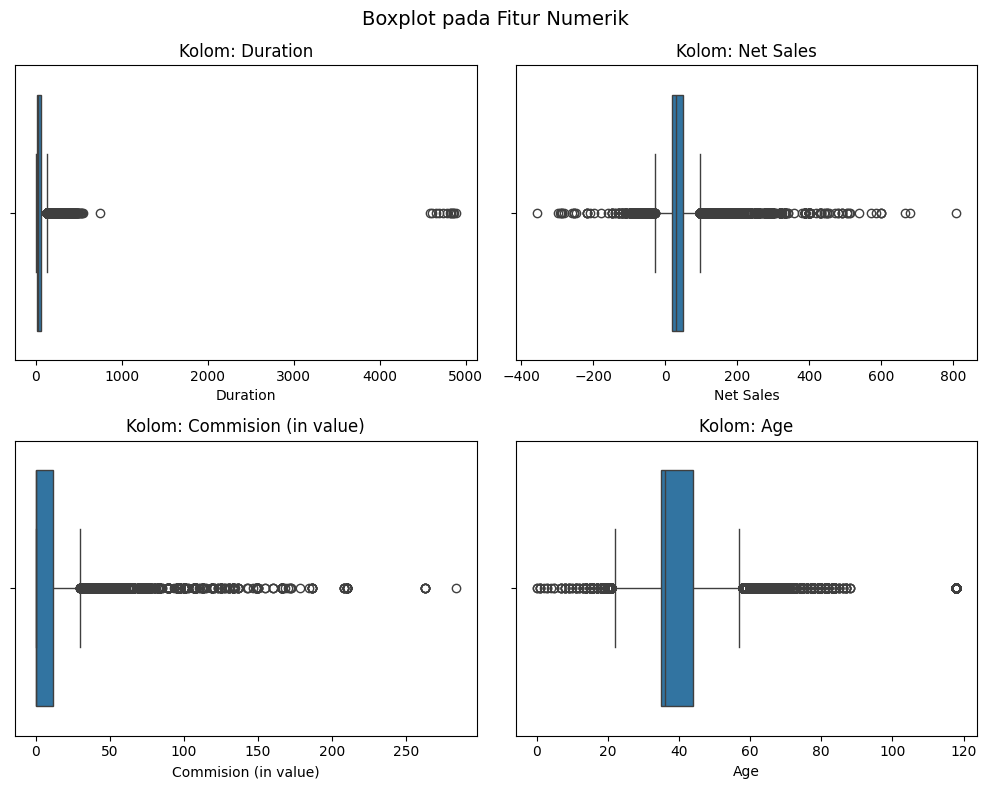

In [13]:
EDA_boxplot(df, "Claim", 2)

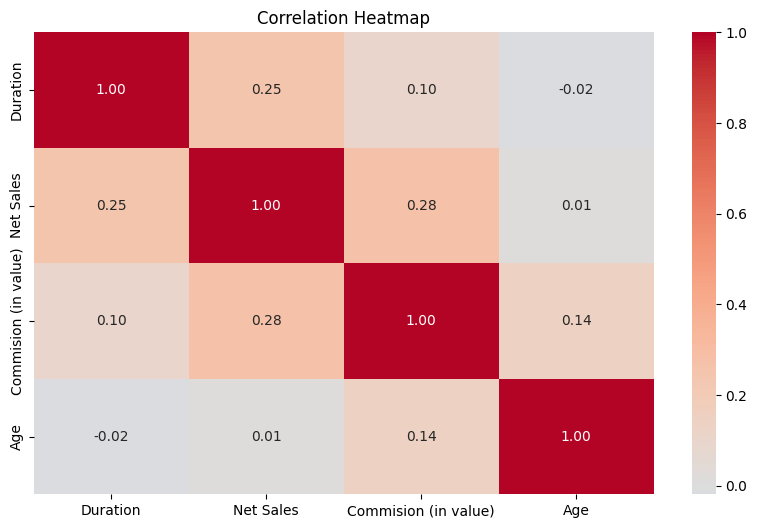

In [14]:
# correlation heatmap of features and target variable
plt.figure(figsize=(10, 6))

# Select only numeric columns for correlation
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr(method='spearman')

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

Dari pengecekan EDA didapatkan informasi :
- Terdapat beberapa kolom numerik yang terdistribusi secara tidak normal dan memiliki outlier yang cukup banyak.
- Dari pengecekan korelasi antar kolom numerik yang menjadi variabel independen, didapatkan bahwa data independen tidak memiliki korelasi yang terlalu tinggi antar satu sama lain. Dengan ini, dapat dikatakan bahwa tidak ada indikasi multikolinearitas antar varibel fitur.

*Kolom Duration*

In [15]:
# Mengecek kolom duration (lama perjalanan dalam hari)
df["Duration"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00      -1.0
0.25      11.0
0.50      25.0
0.75      57.0
1.00    4881.0
Name: Duration, dtype: float64

In [16]:
# Mengecek kolom dengan value 0 dan di bawahnya
len(df[df["Duration"] <= 0])

36

In [17]:
df[df["Duration"] < 0]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
26228,JZI,Airlines,Online,Basic Plan,-1,MALAYSIA,18.0,6.3,118,No
26494,JZI,Airlines,Online,Basic Plan,-1,BRUNEI DARUSSALAM,18.0,6.3,118,No


Saat di cari tahu, ternyata terdapat durasi perjalanan yang bernilai 0 dan -1. 

- Durasi perjalanan bernilai 0 hari kemungkinan besar dikarenakan perjalanan wisata merupakan sebuat *short-trip* atau *one day trip* yang berjarak dekat sehingga perjalanan hanya memakan beberapa jam dan tidak mencapai satu hari penuh. 

- Durasi perjalanan bernilai -1 tidak masuk akal, karena tidak mungkin durasi perjalanan bernilai minus. Maka dari itu, untuk row data dengan kasus ini akan di hapus.

In [18]:
# Proses hapus durasi -1
df = df.drop(df[df["Duration"] < 0].index)

Dari pengecekan normalitas data, terlihat bahwa terdapat nilai outlier `Duration` yang sangat tinggi dengan value di atas 4000 hari. 

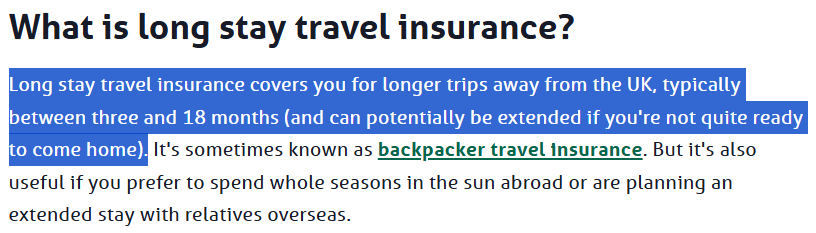

Berdasarkan dari suatu artikel, durasi asuransi setidaknya bisa mencapai 1,5 tahun dan memang dapat diperpanjang lagi. Namun, tidak ada asuransi yang mencapai durasi hingga 10 tahun ke atas. Jadi normalnya durasi asuransi paling besar dikisaran 2 tahun saja.

In [19]:
df[df["Duration"] > 4000]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
87,SSI,Airlines,Online,Ticket Protector,4736,SINGAPORE,0.32,0.09,48,No
4678,SSI,Airlines,Online,Ticket Protector,4857,SINGAPORE,0.32,0.09,48,No
10172,SSI,Airlines,Online,Ticket Protector,4815,SINGAPORE,0.32,0.09,48,No
12140,SSI,Airlines,Online,Ticket Protector,4652,SINGAPORE,0.32,0.09,48,No
19497,SSI,Airlines,Online,Ticket Protector,4881,SINGAPORE,0.13,0.04,48,No
20038,SSI,Airlines,Online,Ticket Protector,4844,SINGAPORE,0.32,0.09,48,No
22215,SSI,Airlines,Online,Ticket Protector,4580,SINGAPORE,0.32,0.09,48,No
25606,SSI,Airlines,Online,Ticket Protector,4685,SINGAPORE,0.32,0.09,48,No
28032,SSI,Airlines,Online,Ticket Protector,4829,SINGAPORE,0.32,0.09,48,No
37207,SSI,Airlines,Online,Ticket Protector,4609,SINGAPORE,0.32,0.09,48,No


In [20]:
# Proses hapus durasi asuransi perjalanan di atas 4000 hari
df = df.drop(df[df["Duration"] > 4000].index)

*Kolom Net Sales*

In [21]:
df["Net Sales"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00   -357.5
0.25     19.0
0.50     29.0
0.75     50.0
1.00    810.0
Name: Net Sales, dtype: float64

In [22]:
df["Net Sales"].mean()

42.2262831633302

In [23]:
df[df["Net Sales"] < 0]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
94,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,-216.75,54.19,36,No
116,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,430,AUSTRALIA,-59.40,35.64,41,No
121,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,77,JAPAN,-29.70,17.82,59,No
199,EPX,Travel Agency,Online,Cancellation Plan,29,HONG KONG,-12.00,0.00,36,No
241,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,57,AUSTRALIA,-59.40,35.64,28,No
...,...,...,...,...,...,...,...,...,...,...
43694,EPX,Travel Agency,Online,2 way Comprehensive Plan,140,UNITED STATES,-98.00,0.00,29,No
43743,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,23,MALAYSIA,-29.70,17.82,29,No
43751,EPX,Travel Agency,Online,2 way Comprehensive Plan,147,SPAIN,-68.00,0.00,36,No
43858,EPX,Travel Agency,Online,Cancellation Plan,49,UNITED KINGDOM,-68.00,0.00,36,No


- Kolom net sales memiliki value negatif, hal ini memungkinkan jika nasabah melakukan pembatalan transaksi atau mengajukan pengembalian dana.
- Kolom ini tidak terdistribusi normal dan cenderung right skewed.

*Kolom Commision*

In [24]:
# Mengubah nama kolom menjadi "Comission" saja supaya lebih ringkas
df.rename(columns={'Commision (in value)': 'Commision'}, inplace=True)

In [25]:
df["Commision"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00      0.00
0.25      0.00
0.50      0.00
0.75     11.88
1.00    283.50
Name: Commision, dtype: float64

- Kolom Commision ini tidak memiliki error value
- Kolom ini tidak terdisrtribusi secara normal dan cenderung right skewed

*Kolom Age*

In [26]:
df["Age"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00      0.0
0.25     35.0
0.50     36.0
0.75     44.0
1.00    118.0
Name: Age, dtype: float64

In [27]:
df[df["Age"] > 100]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision,Age,Claim
99,ART,Airlines,Online,Value Plan,7,MALAYSIA,29.0,10.15,118,No
105,JZI,Airlines,Offline,Basic Plan,16,INDONESIA,37.0,12.95,118,No
363,JWT,Airlines,Online,Value Plan,12,INDIA,39.0,15.60,118,No
373,JWT,Airlines,Online,Value Plan,6,INDIA,39.0,15.60,118,No
727,JWT,Airlines,Online,Value Plan,76,INDIA,100.0,40.00,118,No
...,...,...,...,...,...,...,...,...,...,...
43838,JWT,Airlines,Online,Value Plan,67,INDIA,200.0,80.00,118,No
43856,JWT,Airlines,Online,Value Plan,10,INDIA,50.0,20.00,118,Yes
43928,JWT,Airlines,Online,Value Plan,83,INDIA,180.0,72.00,118,No
44089,JWT,Airlines,Online,Value Plan,42,INDIA,31.0,12.40,118,No


- Pada kolom ini terdapat umur 0, kemungkinan data tersebut milik anak dibawah 1 tahun.
- Kolom ini datanya tidak terdistribusi secara normal, cenderung right skewed.
- Terdapat data dengan umur 118 tahun. Data ini cukup meragukan karena orang dengan umur di atas 100 tahun sangat jarang ditemui di dunia. Dalam data ini sendiri terdapat lebih dari 400 data dengan umur lebih dari 100 tahun. Oleh karena itu, data ini dengan umur lebih dari 100 tahun akan dihapus.

In [28]:
# menghapus data dengan age > 100
df = df.drop(df[df["Age"] > 100].index)

*Kolom Claim*

Kolom Claim adalah kolom target/data dependen. Maka kolom ini akan diubah dari yang ber-value yes/no menjadi 1/0. Hal ini dilakukan untuk mempermudah proses pembuatan model prediksi.

In [29]:
# Ubah value kolom Claim menjadi 1 dan 0
df["Claim"] = df["Claim"].apply(lambda x: 1 if x == "Yes" else 0)

In [30]:
# Pengecekan proporsi kolom klaim
df["Claim"].value_counts(normalize=True)

Claim
0    0.982773
1    0.017227
Name: proportion, dtype: float64

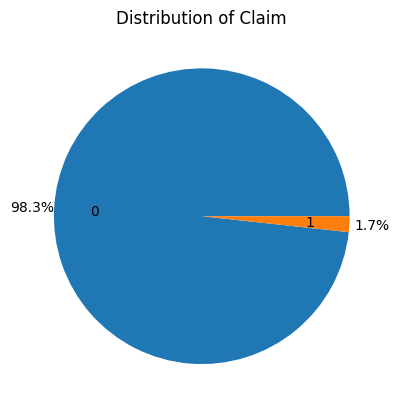

In [31]:
# Hitung proporsi
proportion = df["Claim"].value_counts(normalize=True)

# Plot pie
plt.pie(
    x=proportion, 
    labels=proportion.index,         # label kategori
    autopct='%1.1f%%',              # format persentase
    pctdistance=1.15,               
    labeldistance=0.7               
)

plt.title("Distribution of Claim")
plt.show()

- Dari visualisasi di atas terlihat bahwa data Claim ini memiliki ketidakseimbangan / imbalance yang cukup parah
- Dengan adanya imbalance seperti ini, pada proses pemodelan akan dilakukan imbalance handling

*Final Check*

In [32]:
# Melihat jumlah row dan kolom setelah cleaning
df.shape

(38892, 10)

### **4. Data Preparation**

#### 4.1 Initialization

In [33]:
# Define target and feature variables
# X -> Varibel untuk fitur
# y -> variabel untuk target (Claim)
X = df.drop(columns="Claim")
y = df["Claim"]
display(X.head(), y.head())

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision,Age
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28


0    0
1    0
2    0
3    0
4    0
Name: Claim, dtype: int64

In [34]:
# Splitting Data Train dan Test 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,
                                                    random_state=0,
                                                    stratify=y) # stratify untuk menyesuaikan proporsi data train dan test target

#### 4.2 Data Transformation

- Terdapat fitur yang berupa kategorikal, yaitu Agency, Agency Type, Distribution Channel, Product name, dan Destination
- Selanjutnya akan dilakukan data transformasi untuk melakukan encoding pada data kategorikal dan scaling pada data numerikal

In [35]:
# Identifikasi data kategori
X.select_dtypes("object").nunique()

Agency                   15
Agency Type               2
Distribution Channel      2
Product Name             26
Destination             136
dtype: int64

In [36]:
X.select_dtypes("number").columns

Index(['Duration', 'Net Sales', 'Commision', 'Age'], dtype='object')

- Kolom Agency Type dan Distribution Channel akan dilakukan encoding menggunakan metode One Hot Encoding
- Kolom Agency, Product Name, dan Destination akan dilakukan encoding menggunakan metode Binary Encoding
- Kolom numerikan akan di-scaling menggunakan Robust Scaler

In [37]:
onehot_cols = ["Agency Type", "Distribution Channel"]
binary_cols = ["Agency", "Product Name", "Destination"]
num_cols = X.select_dtypes("number").columns

In [38]:
transformer = ColumnTransformer([
    ("onehot", OneHotEncoder(drop="first", sparse_output=False), onehot_cols),
    ("binary", BinaryEncoder(), binary_cols),
    ("robust", RobustScaler(), num_cols)
], verbose_feature_names_out=False)
transformer

ColumnTransformer(transformers=[('onehot',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['Agency Type', 'Distribution Channel']),
                                ('binary', BinaryEncoder(),
                                 ['Agency', 'Product Name', 'Destination']),
                                ('robust', RobustScaler(),
                                 Index(['Duration', 'Net Sales', 'Commision', 'Age'], dtype='object'))],
                  verbose_feature_names_out=False)

### **5. Model Development**

Kondisi data yang dimiliki tidak seimbang / imbalance. Maka diperlukan imbalance handling. Pada proses pemilihan model ini akan dilakukan perbandingan antara :
1. Model dengan imbalance handling pada model menggunakan *class weight*
2. Model dengan imbalance handling menggunakan resampler (RandomUnderSampler dan SMOTE)

Pada proses penilaian model akan menggunakan Stratified K-Fold pada cross validation. Hal ini supaya pada proses CV data yang diambil ter-stratify dan mengurangi potensi hasil model yang bias.

Dari semua model kandidat akan dilihat nilai F2-Score nya dan juga nilai Recall, Precision, FN, dan FP akan menjadi pertimbangan.

#### 5.1 Baseline Model Selection

In [ ]:
# Model Candidates dengan mengatur class weight pada model
logreg = LogisticRegression(random_state=0, class_weight="balanced")
knn = KNeighborsClassifier(weights="distance")
dtree = DecisionTreeClassifier(random_state=0, class_weight="balanced")
rf = RandomForestClassifier(random_state=0, class_weight="balanced")
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)
xgb = XGBClassifier(random_state=0, scale_pos_weight=scale_pos_weight)
lgbm = LGBMClassifier(random_state=0, class_weight="balanced")
catboost = CatBoostClassifier(random_state=0, auto_class_weights='Balanced')

models = [
    ("LogReg", logreg),
    ("KNN", knn),
    ("DecisionTree", dtree),
    ("RandomForest", rf),
    ("XGBoost", xgb),
    ("LightGBM", lgbm),
    ("CatBoost", catboost)
]

# scoring dict
scoring = {
    "recall": make_scorer(recall_score),
    "precision": make_scorer(precision_score, zero_division=0),
    "f2": make_scorer(fbeta_score, beta=2, zero_division=0)
}

results = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

for name, model in models:
    base_pipeline = Pipeline([
        ("transform", transformer),
        ("model", model)
    ])

    # mengambil nilai cv score
    cv_scores = cross_validate(
        estimator=base_pipeline,
        X=X_train,
        y=y_train,
        cv=skf,
        scoring=scoring
    )

    # mengambil nilai fn dan fp
    train_idx, val_idx = list(skf.split(X_train, y_train))[0]
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    base_pipeline.fit(X_tr, y_tr)
    y_pred = base_pipeline.predict(X_val)

    tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

    results.append({
        "Model": name,
        "Resampler": "In Model",
        "F2 Mean": cv_scores["test_f2"].mean(),
        "F2 Std": cv_scores["test_f2"].std(),
        "Recall Mean": cv_scores["test_recall"].mean(),
        "Precision Mean": cv_scores["test_precision"].mean(),
        "FN (1 Fold)": fn,
        "FP (1 Fold)": fp
    })

[LightGBM] [Info] Number of positive: 434, number of negative: 24726
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 864
[LightGBM] [Info] Number of data points in the train set: 25160, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 434, number of negative: 24726
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 25160, number of used features: 23
[LightGBM] [Info] [binary:

In [ ]:
# Membuat data frame hasil penilaian model selection
df_result_balanced = pd.DataFrame(results)
df_result_balanced.sort_values("F2 Mean", ascending=False)

,Model,Resampler,F2 Mean,F2 Std,Recall Mean,Precision Mean,FN (1 Fold),FP (1 Fold)
5,LightGBM,In Model,0.238678,0.028918,0.518637,0.075583,57,648
0,LogReg,In Model,0.215323,0.013448,0.671662,0.057941,37,1112
6,CatBoost,In Model,0.210958,0.041592,0.380224,0.075884,69,505
4,XGBoost,In Model,0.188922,0.035134,0.289874,0.079098,73,358
2,DecisionTree,In Model,0.076413,0.024882,0.077557,0.072214,102,104
1,KNN,In Model,0.030063,0.018469,0.025807,0.088485,108,21
3,RandomForest,In Model,0.026269,0.014930,0.022188,0.100500,106,21


In [ ]:
# Model Candidates dengan proses imbalace handling menggunakan resampling
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
xgb = XGBClassifier(random_state=0)
lgbm = LGBMClassifier(random_state=0)
catboost = CatBoostClassifier(random_state=0)

# Resampler Candidates
smote = SMOTE(random_state=0)
rus = RandomUnderSampler(random_state=0)

models = [
    ("LogReg", logreg),
    ("KNN", knn),
    ("DecisionTree", dtree),
    ("RandomForest", rf),
    ("XGBoost", xgb),
    ("LightGBM", lgbm),
    ("CatBoost", catboost)
]
resamplers = [
    ("SMOTE", smote),
    ("RandomUnderSampler", rus)
]

scoring = {
    "recall": make_scorer(recall_score),
    "precision": make_scorer(precision_score, zero_division=0),
    "f2": make_scorer(fbeta_score, beta=2, zero_division=0)
}

results = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

for name, model in models:
    for resampleName, resampler in resamplers:
        # base pipeline
        base_pipeline = Pipeline([
            ("transform", transformer),
            ("resample", resampler),
            ("model", model)
        ])

        # hitung cv
        cv_scores = cross_validate(
            estimator=base_pipeline,
            X = X_train,
            y = y_train,
            cv = skf,
            scoring=scoring,
        )

        base_pipeline.fit(X_train, y_train)
        y_pred = base_pipeline.predict(X_test)

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        results.append({
            "Model": name,
            "Resampler": resampleName,
            "F2 Mean": cv_scores["test_f2"].mean(),
            "F2 Std": cv_scores["test_f2"].std(),
            "Recall Mean": cv_scores["test_recall"].mean(),
            "Precision Mean": cv_scores["test_precision"].mean(),
            "FN (1 Fold)": fn,
            "FP (1 Fold)": fp
        })

[LightGBM] [Info] Number of positive: 24726, number of negative: 24726
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5397
[LightGBM] [Info] Number of data points in the train set: 49452, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 24726, number of negative: 24726
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5378
[LightGBM] [Info] Number of data points in the train set: 49452, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

In [ ]:
df_result_resample = pd.DataFrame(results)
df_result_resample.sort_values("F2 Mean", ascending=False)

,Model,Resampler,F2 Mean,F2 Std,Recall Mean,Precision Mean,FN (1 Fold),FP (1 Fold)
0,LogReg,SMOTE,0.218962,0.014552,0.686391,0.058828,37,1487
1,LogReg,RandomUnderSampler,0.207449,0.010718,0.688243,0.054687,37,1504
10,LightGBM,SMOTE,0.202096,0.022840,0.282416,0.095025,96,462
13,CatBoost,RandomUnderSampler,0.199283,0.013147,0.719623,0.051200,34,1810
7,RandomForest,RandomUnderSampler,0.192966,0.012953,0.719640,0.049135,31,2018
8,XGBoost,SMOTE,0.187755,0.032157,0.252854,0.092695,104,356
3,KNN,RandomUnderSampler,0.179765,0.008817,0.736239,0.044687,41,2215
11,LightGBM,RandomUnderSampler,0.176628,0.010440,0.725025,0.043878,36,2187
9,XGBoost,RandomUnderSampler,0.174869,0.011060,0.730598,0.043259,42,2224
2,KNN,SMOTE,0.174680,0.024858,0.356201,0.057527,92,786


In [ ]:
# Menggabungkan hasil penilaian model selection
complete_results = pd.concat([df_result_resample, df_result_balanced])
complete_results.sort_values("F2 Mean", ascending=False)

,Model,Resampler,F2 Mean,F2 Std,Recall Mean,Precision Mean,FN (1 Fold),FP (1 Fold)
5,LightGBM,In Model,0.238678,0.028918,0.518637,0.075583,57,648
0,LogReg,SMOTE,0.218962,0.014552,0.686391,0.058828,37,1487
0,LogReg,In Model,0.215323,0.013448,0.671662,0.057941,37,1112
6,CatBoost,In Model,0.210958,0.041592,0.380224,0.075884,69,505
1,LogReg,RandomUnderSampler,0.207449,0.010718,0.688243,0.054687,37,1504
10,LightGBM,SMOTE,0.202096,0.022840,0.282416,0.095025,96,462
13,CatBoost,RandomUnderSampler,0.199283,0.013147,0.719623,0.051200,34,1810
7,RandomForest,RandomUnderSampler,0.192966,0.012953,0.719640,0.049135,31,2018
4,XGBoost,In Model,0.188922,0.035134,0.289874,0.079098,73,358
8,XGBoost,SMOTE,0.187755,0.032157,0.252854,0.092695,104,356


Dari hasil penilaian pada kandidat model, didapatkan hasil sebagai berikut :
- Model LightGBM dengan penggunaan *class_weight* memiliki F2-Score tertinggi dengan jumlah FN dan FP yang tidak terlalu besar.
- Model Logistic Regression dengan *class_weight* dan *SMOTE* juga memiliki F2-Score yang tinggi dengan standar deviasi yang lebih kecil dari model LightGBM.
- Dapat disimpulkan bahwa model LightGBM memiliki skor model yang bagus, namun model Logistic Regression memiliki skor yang lebih stabil (karena std lebih kecil)

Berdasarkan poin-poin di atas, dari seluruh kandidat model akan dipilih dua model yaitu LGBM dan LogReg. Selanjutnya akan dilakukan tuning pada kedua model ini. Kemudian model final akan dipilih dari kedua kandidat ini berdasarkan hasil tuning dengan cost-benefit yang paling menguntungkan.

Sebelum benas-benar masuk ke proses tuning kedua model, akan dilihat terlebih dahulu bagaimana hasil fitting dengan base model.

*Base Model*

In [ ]:
# base model dengan LGBM
LGBM_basemodel = Pipeline([
    ("transform", transformer),
    ("model", LGBMClassifier(random_state=0, class_weight="balanced", verbosity=-1))
])
LGBM_basemodel

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination']),
                                                 ('robust', RobustScaler(),
                                                  Index(['Duration', 'Net Sales', 'Commision', 'Age'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('model',
                 LGBMClassifier(class_weight='balanced', random_state=0,
                                verbosity=-1))])

In [ ]:
LGBM_basemodel.fit(X_train, y_train)

y_train_base = LGBM_basemodel.predict(X_train)
y_test_base = LGBM_basemodel.predict(X_test)

# for confusionmatrix
cm_lgbm_basemodel = confusion_matrix(y_test, y_test_base)

print("SCORE FOR LGBM BASE MODEL")

f2_train = fbeta_score(y_train, y_train_base, beta=2)
f2_test = fbeta_score(y_test, y_test_base, beta=2)

print(f"Train f2 (Base Model): {f2_train:.4f}")
print(f"Test f2 (Base Model): {f2_test:.4f}")

SCORE FOR LGBM BASE MODEL
Train f2 (Base Model): 0.4057
Test f2 (Base Model): 0.2204


In [ ]:
logreg_basemodel = Pipeline([
    ("transform", transformer),
    ("resampler", SMOTE(random_state=0)),
    ("model", LogisticRegression(random_state=0))
])
logreg_basemodel

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination']),
                                                 ('robust', RobustScaler(),
                                                  Index(['Duration', 'Net Sales', 'Commision', 'Age'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('resampler', SMOTE(random_state=0)),
                ('model', LogisticRegression(random_state=0))])

In [ ]:
logreg_basemodel.fit(X_train, y_train)

y_train_base = logreg_basemodel.predict(X_train)
y_test_base = logreg_basemodel.predict(X_test)

# for confusionmatrix
cm_logreg_basemodel = confusion_matrix(y_test, y_test_base)

print("SCORE FOR LOGISTIC REGRESSION BASE MODEL")

f2_train = fbeta_score(y_train, y_train_base, beta=2)
f2_test = fbeta_score(y_test, y_test_base, beta=2)

print(f"Train f2 (Base Model): {f2_train:.4f}")
print(f"Test f2 (Base Model): {f2_test:.4f}")

SCORE FOR LOGISTIC REGRESSION BASE MODEL
Train f2 (Base Model): 0.2226
Test f2 (Base Model): 0.2242


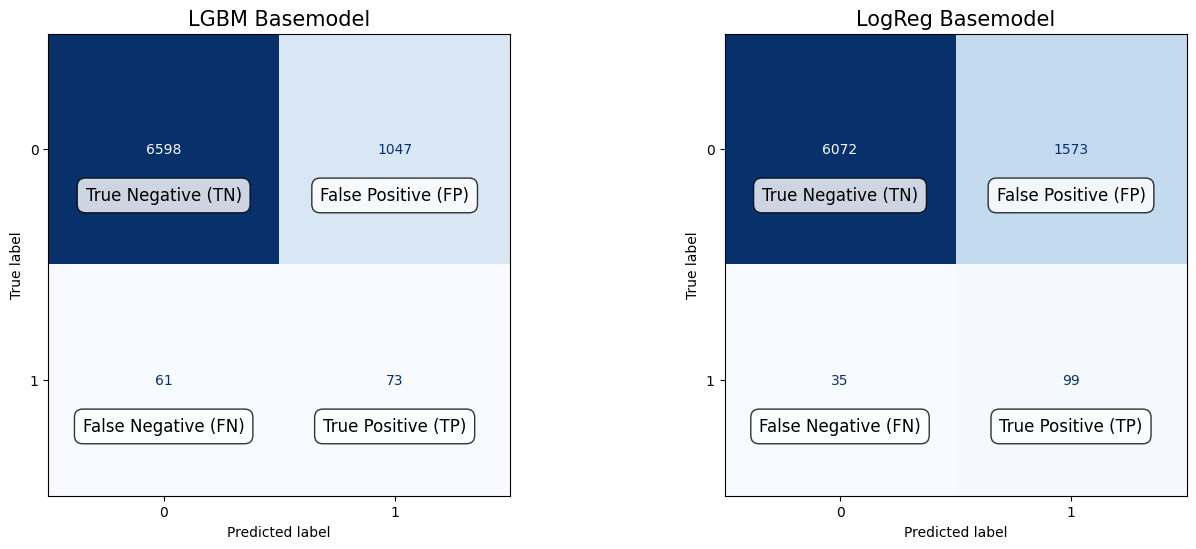

In [ ]:
figure, axes = plt.subplots(ncols=2, figsize=(16,6))

# --- LGBM Basemodel ---
disp_base = ConfusionMatrixDisplay(confusion_matrix=cm_lgbm_basemodel)
disp_base.plot(cmap='Blues', ax=axes[0], colorbar=False)

labels = np.array([["True Negative (TN)", "False Positive (FP)"],
                   ["False Negative (FN)", "True Positive (TP)"]])

for i in range(cm_lgbm_basemodel.shape[0]):
    for j in range(cm_lgbm_basemodel.shape[1]):
        text = f"{labels[i, j]}"
        axes[0].text(j, i + 0.2, text,
                     ha="center", va="center", color="black", fontsize=12,
                     bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

axes[0].set_title("LGBM Basemodel", fontsize=15)

# --- LogReg Basemodel ---
disp_base = ConfusionMatrixDisplay(confusion_matrix=cm_logreg_basemodel)
disp_base.plot(cmap='Blues', ax=axes[1], colorbar=False)

for i in range(cm_logreg_basemodel.shape[0]):
    for j in range(cm_logreg_basemodel.shape[1]):
        text = f"{labels[i, j]}"
        axes[1].text(j, i + 0.2, text,
                     ha="center", va="center", color="black", fontsize=12,
                     bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

axes[1].set_title("LogReg Basemodel", fontsize=15)

plt.show()


Jika sekilas dilihat dari skor untuk basemodel LGBM dan Logistic Regression, didapatkan bahwa :
- Skor F2 LGBM terlihat overfitting karena skor train lebih tinggi daripada skor testnya
- Skor F2 LogReg terlihat sudah cukup stabil
- Berdasarkan confusion matrix, jumlah FP pada model LogReg lebih besar namun jumlah FN nya lebih kecil daripada model LGBM.

Selanjutnya akan dilakukan tuning pada kedua model supaya lebih mengurangi jumlah FN dan FP. Nantinya akan dipilih model terbaik dengan jumlah FN dan FP paling minimum atau dengan cost-benefit yang paling menguntungkan.

#### 5.2 Model Tuning

Pada proses model tuning ini metrik evaluasi yang digunakan masih sama, yaitu F2-Score.
1. Pertama akan diinisalisasi scorer yang dipakai untuk tuning
2. Dilakukan tuning pada dua kandidat model, yaitu **LGBM (dengan class_weight)** dan **LogisticRegression (dengan SMOTE)**
3. Dari hasil tuning akan dibandingkan nilai F2-Score serta jumlah FN dan FP

In [ ]:
# set scorer untuk tuning model
f2_scorer = make_scorer(fbeta_score, beta=2)

*Tuning untuk model LightGBM*

In [ ]:
hyperparam_lgbm = {
    # --- Tree boosting parameters ---
    "model__n_estimators": [200, 500, 800],          # jumlah boosting rounds (tidak terlalu besar biar ga overfit)
    "model__learning_rate": [0.01, 0.05, 0.1],       # kecilin learning rate biar model belajar pelan2
    "model__max_depth": [3, 5, 7, -1],               # kontrol kedalaman pohon, -1 = unlimited (cenderung overfit)
    "model__num_leaves": [15, 31, 63],               # semakin banyak leaves semakin kompleks → atur biar moderat
    "model__min_child_samples": [50, 100, 200],      # minimum data per leaf, makin besar = regularisasi lebih kuat
    "model__min_child_weight": [1e-3, 0.01, 0.1],    # regularisasi tambahan untuk leaf splitting
    
    # --- Regularization ---
    "model__reg_alpha": [0, 0.1, 1],                 # L1 regularization
    "model__reg_lambda": [0, 0.1, 1],                # L2 regularization
    
    # --- Feature fraction & bagging (stochastic training untuk cegah overfit) ---
    "model__colsample_bytree": [0.6, 0.8, 1.0],      # fraction fitur per tree
    "model__subsample": [0.6, 0.8, 1.0],             # fraction data per boosting iteration
    "model__subsample_freq": [1, 5],                 # frekuensi subsample
    
    # --- Imbalance handling ---
    "model__scale_pos_weight": [1, 2, 5, 10]         # untuk imbalance (rasio neg/pos bisa dicoba manual)
}

In [ ]:
randomsearch = RandomizedSearchCV(
    estimator=LGBM_basemodel,
    param_distributions=hyperparam_lgbm,
    cv=5,
    scoring=f2_scorer,
    n_iter=50,
    verbose=1,
    random_state=0,
    n_jobs=-1
)

randomsearch

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transform',
                                              ColumnTransformer(transformers=[('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse_output=False),
                                                                               ['Agency '
                                                                                'Type',
                                                                                'Distribution '
                                                                                'Channel']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['Agency',
                                                                                'Product '
                                                                                'Name',
                                                                                'Destination']),
                                                                              ('robust',
                                                                               RobustScaler(),
                                                                               Index(['Duration', 'Net Sales', 'Commision', 'Age'], dtype='object'...
                                        'model__min_child_weight': [0.001, 0.01,
                                                                    0.1],
                                        'model__n_estimators': [200, 500, 800],
                                        'model__num_leaves': [15, 31, 63],
                                        'model__reg_alpha': [0, 0.1, 1],
                                        'model__reg_lambda': [0, 0.1, 1],
                                        'model__scale_pos_weight': [1, 2, 5,
                                                                    10],
                                        'model__subsample': [0.6, 0.8, 1.0],
                                        'model__subsample_freq': [1, 5]},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2),
                   verbose=1)

In [ ]:
randomsearch.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transform',
                                              ColumnTransformer(transformers=[('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse_output=False),
                                                                               ['Agency '
                                                                                'Type',
                                                                                'Distribution '
                                                                                'Channel']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['Agency',
                                                                                'Product '
                                                                                'Name',
                                                                                'Destination']),
                                                                              ('robust',
                                                                               RobustScaler(),
                                                                               Index(['Duration', 'Net Sales', 'Commision', 'Age'], dtype='object'...
                                        'model__min_child_weight': [0.001, 0.01,
                                                                    0.1],
                                        'model__n_estimators': [200, 500, 800],
                                        'model__num_leaves': [15, 31, 63],
                                        'model__reg_alpha': [0, 0.1, 1],
                                        'model__reg_lambda': [0, 0.1, 1],
                                        'model__scale_pos_weight': [1, 2, 5,
                                                                    10],
                                        'model__subsample': [0.6, 0.8, 1.0],
                                        'model__subsample_freq': [1, 5]},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2),
                   verbose=1)

In [ ]:
print("Best parameters & score for LGBM Model")
randomsearch.best_params_

Best parameters & score for LGBM Model


{'model__subsample_freq': 5,
 'model__subsample': 0.8,
 'model__scale_pos_weight': 1,
 'model__reg_lambda': 1,
 'model__reg_alpha': 1,
 'model__num_leaves': 31,
 'model__n_estimators': 800,
 'model__min_child_weight': 0.1,
 'model__min_child_samples': 100,
 'model__max_depth': -1,
 'model__learning_rate': 0.01,
 'model__colsample_bytree': 0.8}

In [ ]:
randomsearch.best_score_

0.24880736856795177

In [ ]:
results = randomsearch.cv_results_
mean_time_lgbm = results['mean_fit_time'].mean()
mean_time_lgbm

7.132238472938537

In [ ]:
# hasil tuning disimpan
tuned_lgbm = randomsearch.best_estimator_

*Tuning untuk model Logistic Regression*

In [ ]:
hyperparam_logreg = {
    # --- Resampling (SMOTE) ---
    "resampler__sampling_strategy": [0.3, 0.5, 0.7, 1.0],  # coba beberapa rasio balancing
    
    # --- Logistic Regression ---
    "model__penalty": ["l1", "l2", "elasticnet", "none"],  # jenis regularisasi
    "model__C": [0.01, 0.1, 1, 10],                       # strength regulasi (kecil = regulasi kuat)
    "model__solver": ["liblinear", "saga"],               # solver yg support l1 & elasticnet
    "model__l1_ratio": [0.1, 0.5, 0.9],                   # khusus untuk elasticnet (0 = L2, 1 = L1)
    "model__class_weight": ["balanced", None]
}

In [ ]:
randomsearch = RandomizedSearchCV(
    estimator=logreg_basemodel,
    param_distributions=hyperparam_logreg,
    cv=5,
    scoring=f2_scorer,
    n_iter=50,
    verbose=1,
    random_state=0,
    n_jobs=-1
)

randomsearch

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transform',
                                              ColumnTransformer(transformers=[('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse_output=False),
                                                                               ['Agency '
                                                                                'Type',
                                                                                'Distribution '
                                                                                'Channel']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['Agency',
                                                                                'Product '
                                                                                'Name',
                                                                                'Destination']),
                                                                              ('robust',
                                                                               RobustScaler(),
                                                                               Index(['Duration', 'Net Sales', 'Commision', 'Age'], dtype='object'...
                   n_iter=50, n_jobs=-1,
                   param_distributions={'model__C': [0.01, 0.1, 1, 10],
                                        'model__class_weight': ['balanced',
                                                                None],
                                        'model__l1_ratio': [0.1, 0.5, 0.9],
                                        'model__penalty': ['l1', 'l2',
                                                           'elasticnet',
                                                           'none'],
                                        'model__solver': ['liblinear', 'saga'],
                                        'resampler__sampling_strategy': [0.3,
                                                                         0.5,
                                                                         0.7,
                                                                         1.0]},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2),
                   verbose=1)

In [ ]:
randomsearch.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transform',
                                              ColumnTransformer(transformers=[('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             sparse_output=False),
                                                                               ['Agency '
                                                                                'Type',
                                                                                'Distribution '
                                                                                'Channel']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['Agency',
                                                                                'Product '
                                                                                'Name',
                                                                                'Destination']),
                                                                              ('robust',
                                                                               RobustScaler(),
                                                                               Index(['Duration', 'Net Sales', 'Commision', 'Age'], dtype='object'...
                   n_iter=50, n_jobs=-1,
                   param_distributions={'model__C': [0.01, 0.1, 1, 10],
                                        'model__class_weight': ['balanced',
                                                                None],
                                        'model__l1_ratio': [0.1, 0.5, 0.9],
                                        'model__penalty': ['l1', 'l2',
                                                           'elasticnet',
                                                           'none'],
                                        'model__solver': ['liblinear', 'saga'],
                                        'resampler__sampling_strategy': [0.3,
                                                                         0.5,
                                                                         0.7,
                                                                         1.0]},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2),
                   verbose=1)

In [ ]:
print("Best parameters & score for LogReg Model")
randomsearch.best_params_

Best parameters & score for LogReg Model


{'resampler__sampling_strategy': 0.5,
 'model__solver': 'saga',
 'model__penalty': 'l2',
 'model__l1_ratio': 0.9,
 'model__class_weight': None,
 'model__C': 0.1}

In [ ]:
results = randomsearch.cv_results_
mean_time_logreg = results['mean_fit_time'].mean()
mean_time_logreg

5.767018522262574

In [ ]:
randomsearch.best_score_

0.2552898088479509

In [ ]:
# model hasil tuning disimpan
tuned_logreg = randomsearch.best_estimator_

*Proses membandingkan model yang sudah di-tuning*

In [ ]:
tuned_lgbm.fit(X_train, y_train)

y_train_tuned = tuned_lgbm.predict(X_train)
y_test_tuned = tuned_lgbm.predict(X_test)

# for confusionmatrix
cm_tuned_lgbm = confusion_matrix(y_test, y_test_tuned)

print("SCORE FOR LGBM TUNED MODEL")

f2_train = fbeta_score(y_train, y_train_tuned, beta=2)
f2_test = fbeta_score(y_test, y_test_tuned, beta=2)

print(f"Train f2 (Tuned Model): {f2_train:.4f}")
print(f"Test f2 (Tuned Model): {f2_test:.4f}")

tuned_logreg.fit(X_train, y_train)

y_train_tuned = tuned_logreg.predict(X_train)
y_test_tuned = tuned_logreg.predict(X_test)

# for confusionmatrix
cm_tuned_logreg = confusion_matrix(y_test, y_test_tuned)

print("\nSCORE FOR LOGREG TUNED MODEL")

f2_train = fbeta_score(y_train, y_train_tuned, beta=2)
f2_test = fbeta_score(y_test, y_test_tuned, beta=2)

print(f"Train f2 (Tuned Model): {f2_train:.4f}")
print(f"Test f2 (Tuned Model): {f2_test:.4f}")

SCORE FOR LGBM TUNED MODEL
Train f2 (Tuned Model): 0.3637
Test f2 (Tuned Model): 0.2287
SCORE FOR LOGREG TUNED MODEL
Train f2 (Tuned Model): 0.2568
Test f2 (Tuned Model): 0.2688


- Dari hasil tuning kedua model, dapat terlihat bahwa model LGBM masih mengalami overfitting
- Pada model LogRef model sedikit mengalami underfitting tapi masih cukup stabil dan besar skor F2 meningkat dari sebelum tuning

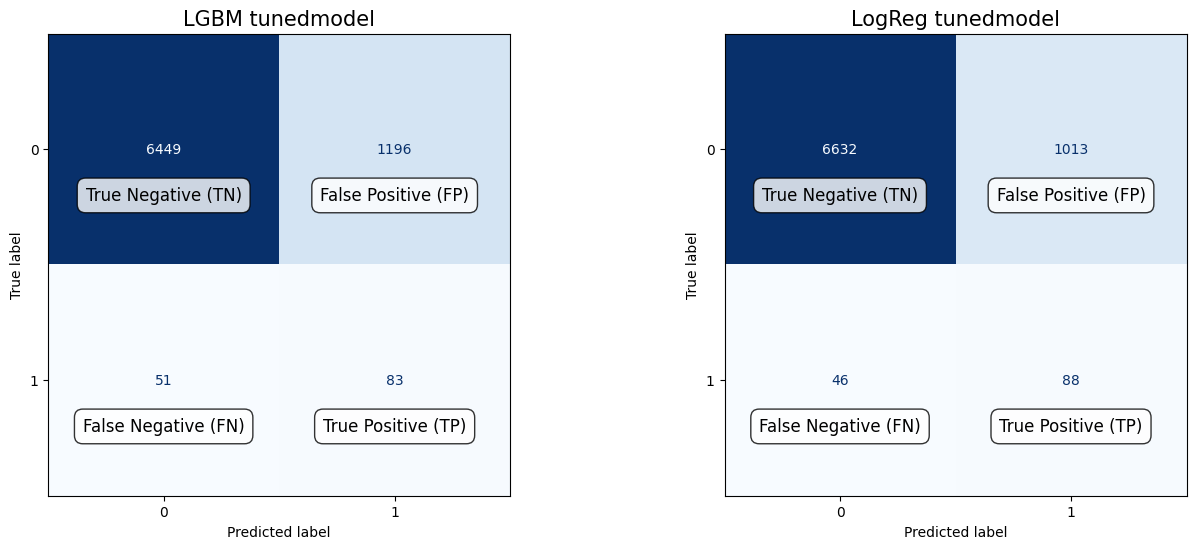

In [ ]:
figure, axes = plt.subplots(ncols=2, figsize=(16,6))

# --- LGBM tunedmodel ---
disp_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_lgbm)
disp_tuned.plot(cmap='Blues', ax=axes[0], colorbar=False)

labels = np.array([["True Negative (TN)", "False Positive (FP)"],
                   ["False Negative (FN)", "True Positive (TP)"]])

for i in range(cm_tuned_lgbm.shape[0]):
    for j in range(cm_tuned_lgbm.shape[1]):
        text = f"{labels[i, j]}"
        axes[0].text(j, i + 0.2, text,
                     ha="center", va="center", color="black", fontsize=12,
                     bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

axes[0].set_title("LGBM tunedmodel", fontsize=15)

# --- LogReg tunedmodel ---
disp_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_logreg)
disp_tuned.plot(cmap='Blues', ax=axes[1], colorbar=False)

for i in range(cm_tuned_logreg.shape[0]):
    for j in range(cm_tuned_logreg.shape[1]):
        text = f"{labels[i, j]}"
        axes[1].text(j, i + 0.2, text,
                     ha="center", va="center", color="black", fontsize=12,
                     bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

axes[1].set_title("LogReg tunedmodel", fontsize=15)

plt.show()

***Keputusan Pemilihan Model Final***

Berdasarkan kedua model yang telah di-tuning ini, dapat dilihat bahwa F2-score untuk model Logistic Regression memiliki skor yang cukup bagus dan stabil antara skor train dan testnya. Sedangkan pada model LGBM F2-Score nya masih overfitting walaupun sudah di-tuning.

Lalu jika dilihat berdasarkan confusion matrix kedua model setelah di-tuning, sebetulnya kedua model cukup bagus dan jumlah FN maupun FP berkurang dari sebelum tuning. Namun, pada model Logistic Regression FN dan FP nya cenderung lebih kecil.

Dengan demikian, model final yang akan dipilih untuk prediksi adalah **Logistic Regression**.

#### 5.3 Model Evaluation & Finalization

Setelah memilih model terbaik, yaitu Logistic Regression, selanjutnya akan dilakukan evaluasi nilai ROC dan AUC nya. Evaluasi ini bertujuan melihat kemampuan model ini untuk membedakan kelas positif dan negatif. Lalu akan dilakukan juga threshold tuning, dengan harapan kemampuan model dapat meningkat lagi.

*Evaluasi Nilai ROC AUC*

In [ ]:
# fungsi untuk evaluasi ROC AUC, Recall, f2score
def evaluate_model(model, X_train, X_test, y_train, y_test, threshold=0.5):
    # Prediksi probabilitas kelas positif
    y_train_prob = model.predict_proba(X_train)[:, 1]
    y_test_prob = model.predict_proba(X_test)[:, 1]

    # Konversi probabilitas ke prediksi label pakai threshold custom
    y_train_pred = (y_train_prob >= threshold).astype(int)
    y_test_pred = (y_test_prob >= threshold).astype(int)

    # Confusion Matrix untuk Train dan Test
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)
        
    # Visualisasi Confusion Matrix
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Pred 0', 'Pred 1'],
                yticklabels=['True 0', 'True 1'], ax=ax[0])
    ax[0].set_title(f'Confusion Matrix - Train (Threshold={threshold:.2f})')
    
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Pred 0', 'Pred 1'],
                yticklabels=['True 0', 'True 1'], ax=ax[1])
    ax[1].set_title(f'Confusion Matrix - Test (Threshold={threshold:.2f})')

    plt.tight_layout()
    plt.show()

    # ROC Curve and AUC
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

    auc_train = auc(fpr_train, tpr_train)
    auc_test = auc(fpr_test, tpr_test)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC (AUC = {auc_train:.2f})')
    plt.plot(fpr_test, tpr_test, color='red', label=f'Test ROC (AUC = {auc_test:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    # Tambahan: cetak metrik utama
    print(f"Threshold = {threshold}")
    print("Train metrics:")
    print(" Recall:", recall_score(y_train, y_train_pred))
    print(" Precision:", precision_score(y_train, y_train_pred, zero_division=0))
    print(" F2:", fbeta_score(y_train, y_train_pred, beta=2, zero_division=0))
    print()
    print("Test metrics:")
    print(" Recall:", recall_score(y_test, y_test_pred))
    print(" Precision:", precision_score(y_test, y_test_pred, zero_division=0))
    print(" F2:", fbeta_score(y_test, y_test_pred, beta=2, zero_division=0))


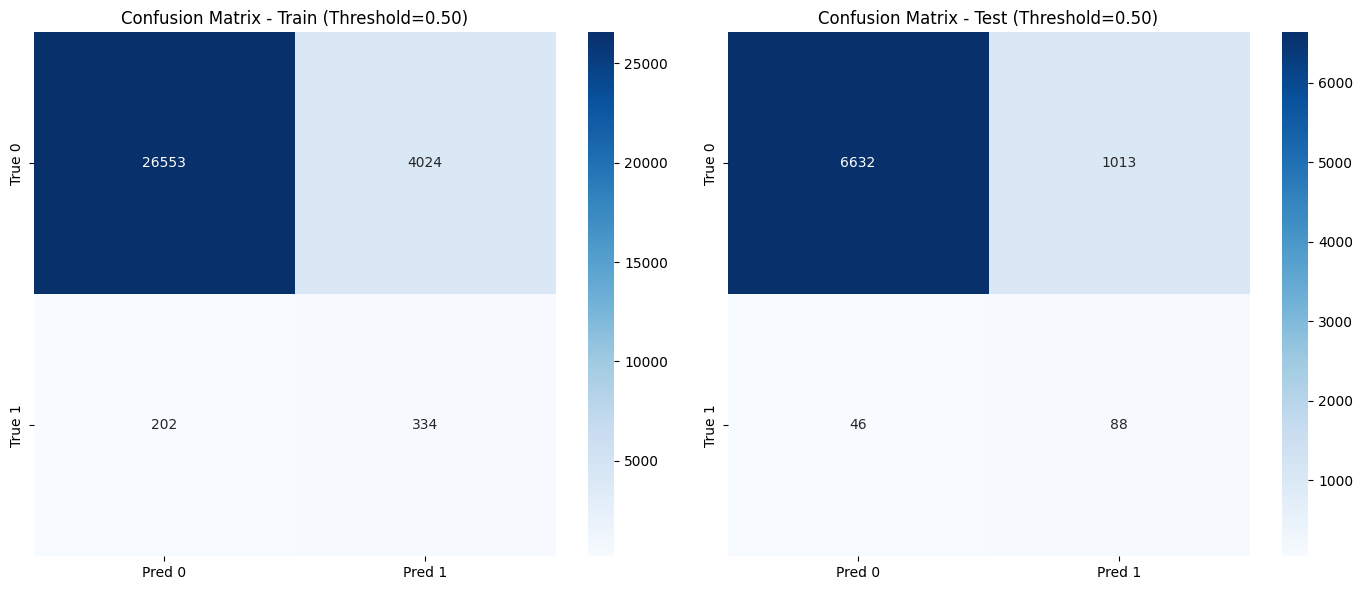

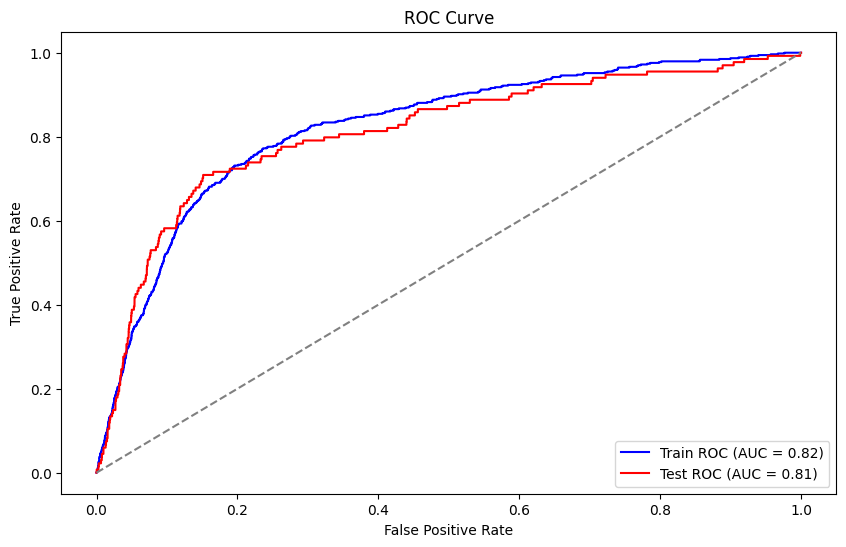

Threshold = 0.5
Train metrics:
 Recall: 0.6231343283582089
 Precision: 0.07664066085360258
 F2: 0.2568440479852353

Test metrics:
 Recall: 0.6567164179104478
 Precision: 0.07992733878292461
 F2: 0.2687843616371411


In [ ]:
evaluate_model(tuned_logreg, X_train, X_test, y_train, y_test)

Evaluasi di atas adalah model tuned logistic regression dengan threshold default, yaitu 0.5. Berdasarkan evaluasi, didapatkan kisaran nilai AUC sebesar 0.81. Artinya model ini memiliki kemampuan membedakan kasus positif dan negatif dengan kemungkinan sebesar 81%.

*Threshold Tuning*

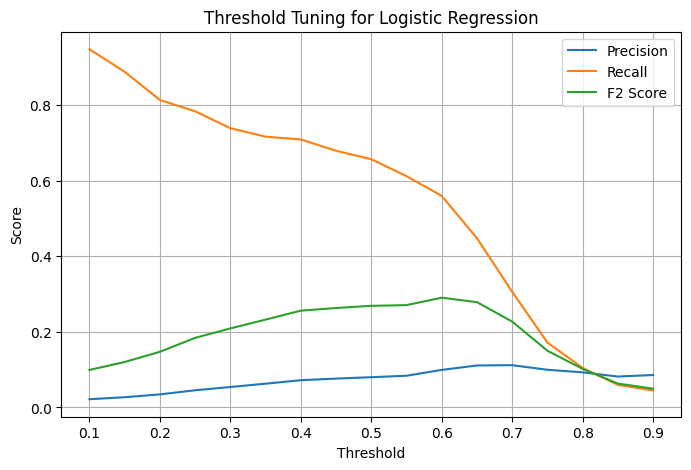

In [ ]:
# Fit logistic regression model
tuned_logreg.fit(X_train, y_train)

# Prediksi probabilitas untuk kelas positif
y_probs = tuned_logreg.predict_proba(X_test)[:, 1]

# Coba berbagai threshold
thresholds = np.arange(0.1, 0.91, 0.05)
results = []

for t in thresholds:
    y_pred = (y_probs >= t).astype(int)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)
    results.append((t, precision, recall, f2))

# Convert ke array biar gampang
results = np.array(results)

# Plot trade-off threshold
plt.figure(figsize=(8,5))
plt.plot(results[:,0], results[:,1], label="Precision")
plt.plot(results[:,0], results[:,2], label="Recall")
plt.plot(results[:,0], results[:,3], label="F2 Score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold Tuning for Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

Analisis dari threshold tuning menunjukan, apabila skor recall terlalu tinggi akan menyebabkan trade-off pada nilai precision yang kemungkinan terjadi karena imbalance data. Jika difokuskan untuk mengambil threshold dengan F2-Score yang paling stabil (untuk meminimalisir trade-off), dalam grafik di atas terlihat F2-score tertinggi berada pada kisaran 0.55-0.65. Namun,  disini saya ingin mengambil nilai threshold dengan skor recall yang tidak terlalu rendah (untuk meminimalisir FN). Maka threshold 0.55 dapat disimpulkan menjadi threshold yang optimal untuk model ini. Untuk memastikannya, akan dilakukan evaluasi menggunakan threshold ini.

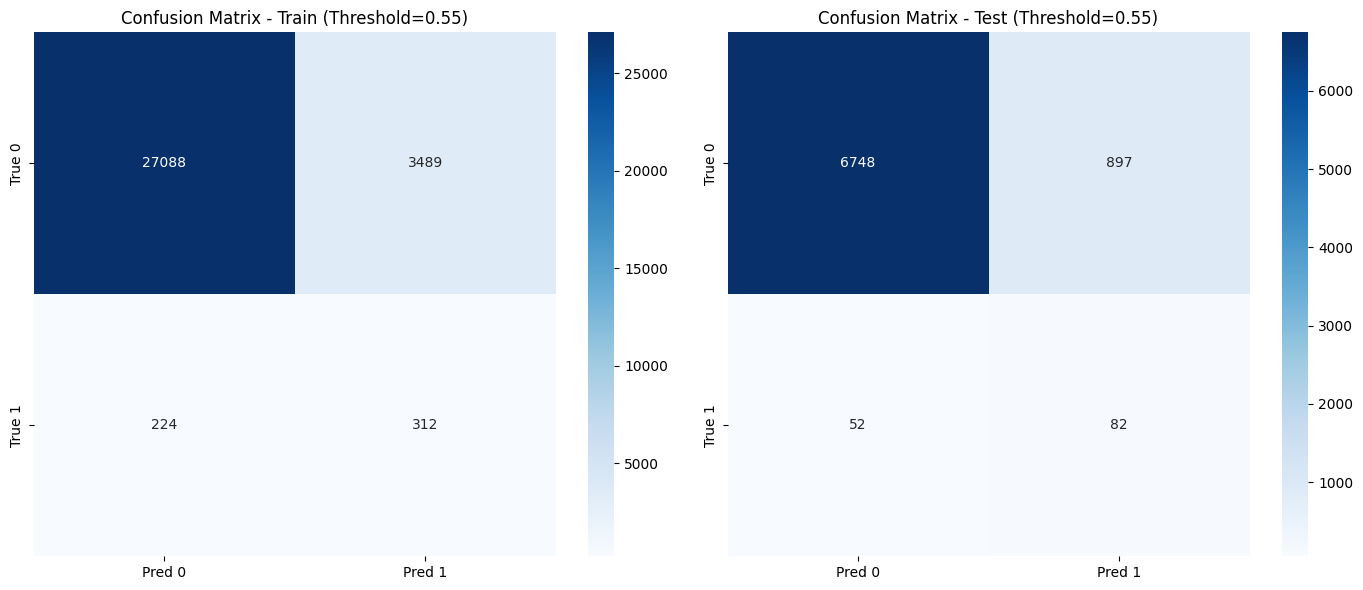

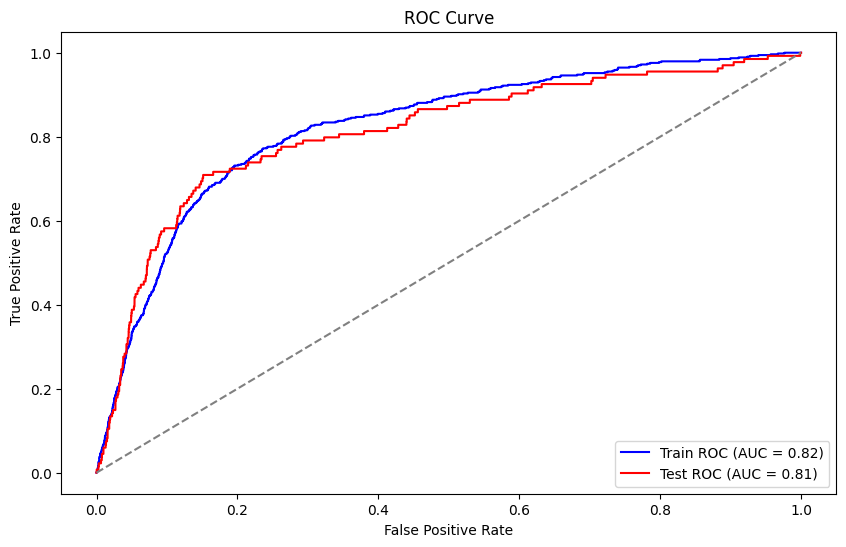

Threshold = 0.55
Train metrics:
 Recall: 0.582089552238806
 Precision: 0.08208366219415943
 F2: 0.2624053826745164

Test metrics:
 Recall: 0.6119402985074627
 Precision: 0.08375893769152196
 F2: 0.2706270627062706


In [ ]:
evaluate_model(tuned_logreg, X_train, X_test, y_train, y_test, 0.55) # evaluasi dengan threshold 0.55

Dengan threshold 0.55, didapatkan F2-Score yang sebelumnya dikisaran 25%-26% sekarang meningkat menjadi 26%-27%. Lalu untuk nilai train dan test nya pun masih cukup stabil. Jika dilihat skor recall nya juga tidak terlalu rendah (> 58%). Maka dapat diputuskan bahwa nilai **0.55** akan digunakan sebagai threshold.

#### 5.4 Model Explanation & Interpretation

Selanjutnya akan dilakukan analisis terhadap interpretasi pengaruh fitur yang ada terhadap prediksi model.

In [ ]:
tuned_logreg

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination']),
                                                 ('robust', RobustScaler(),
                                                  Index(['Duration', 'Net Sales', 'Commision', 'Age'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('resampler', SMOTE(random_state=0, sampling_strategy=0.5)),
                ('model',
                 LogisticRegression(C=0.1, l1_ratio=0.9, random_state=0,
                                    solver='saga'))])

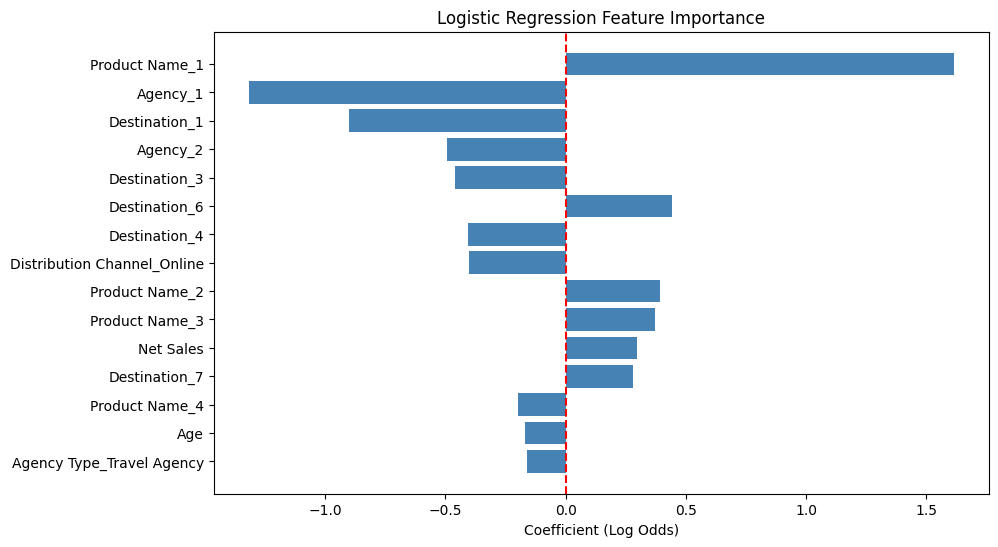

,Feature,Coefficient,Abs_Coefficient
7,Product Name_1,1.613151,1.613151
3,Agency_1,-1.316397,1.316397
12,Destination_1,-0.900321,0.900321
4,Agency_2,-0.493783,0.493783
14,Destination_3,-0.458091,0.458091
17,Destination_6,0.441526,0.441526
15,Destination_4,-0.406372,0.406372
1,Distribution Channel_Online,-0.400023,0.400023
8,Product Name_2,0.393286,0.393286
9,Product Name_3,0.371397,0.371397


In [ ]:
# ambil model logistic regression dari pipeline
logreg_model = tuned_logreg.named_steps["model"]

# ambil feature names dari transformer (output setelah preprocessing)
feature_names = tuned_logreg.named_steps["transform"].get_feature_names_out()

# ambil koefisien
coefs = logreg_model.coef_[0]

# buat dataframe importance
importance = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefs,
    "Abs_Coefficient": np.abs(coefs)
}).sort_values(by="Abs_Coefficient", ascending=False)

# plot top 15 feature importance
plt.figure(figsize=(10,6))
plt.barh(importance["Feature"][:15], importance["Coefficient"][:15], color="steelblue")
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Coefficient (Log Odds)")
plt.title("Logistic Regression Feature Importance")
plt.gca().invert_yaxis()
plt.show()
importance


- Secara keseluruhan, tipe Product Name, Destination, dan Agency memiliki pengaruh pada prediksi
- Net sales dan Commision memiliki pengaruh untuk meningkatkan peluang adanya claim, namun pengaruh nya tidak terlalu besar
- Agency Type dan Distribution Channel cenderung memiliki pengaruh untuk menurunkan peluang adanya claim

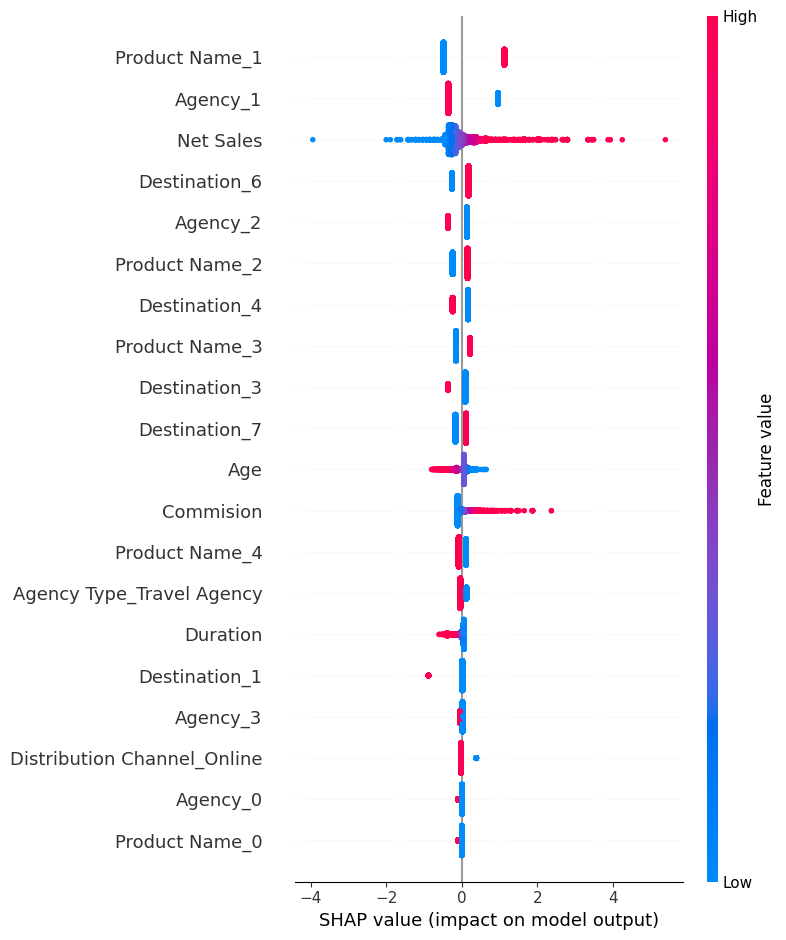

In [ ]:
# ambil model logreg dari pipeline
logreg_model = tuned_logreg.named_steps["model"]

# ambil feature names
feature_names = tuned_logreg.named_steps["transform"].get_feature_names_out()

# transform data (perlu supaya sama dengan input ke logreg)
X_transformed = tuned_logreg.named_steps["transform"].transform(X_test)

# buat explainer shap
explainer = shap.Explainer(logreg_model, X_transformed, feature_names=feature_names)

# hitung shap values
shap_values = explainer(X_transformed)

# --- Summary plot (global importance) ---
plt.figure(figsize=(6, 4))
shap.summary_plot(shap_values, X_transformed, feature_names=feature_names, show=False)
plt.tight_layout()
plt.show()

- Berdasarkan interpretasi model menggunakan SHAP, terlihat bahwa model cukup konsisten dalam membedakan nilai positif dan negatif berdasarkan tiap variabel independen. 
- Berdasarkan grafik ini dan nilai coefficient importance, Product Name dengan digit ke-dua bernilai 1 kemungkinan besar paling berpengaruh pada model ini.

In [ ]:
# Mencari Product Name dengan digit kedua bernilai 1
encoder = BinaryEncoder(cols=["Product Name"])
X_encoded = encoder.fit_transform(df[["Product Name"]])
encoded_productname = pd.concat([df[["Product Name"]], X_encoded], axis=1)

kategori_digit2 = encoded_productname.loc[encoded_productname["Product Name_1"] == 1, "Product Name"].unique()
kategori_digit2 = pd.DataFrame(kategori_digit2)
kategori_digit2

,0
0,Single Trip Travel Protect Gold
1,Silver Plan
2,Value Plan
3,24 Protect
4,Annual Travel Protect Gold
5,Comprehensive Plan
6,Ticket Protector
7,Travel Cruise Protect
8,Annual Travel Protect Platinum
9,Spouse or Parents Comprehensive Plan


*Interpretation Results*
- Terdapat beberapa `Product Name` yang kemungkinan besar **paling berpengaruh** pada keputusan model dengan kecenderungan meningkatkan kemungkinan *Claim*. Produk tersebut diantaranya seperti Single Trip Travel Protect Gold, Silver Plan, Value Plan, dll.
- Semakin besar `Net Sales` dan `Commision`, maka akan semakin tinggi peluang adanya *Claim*

### **6. Model Implementation**

Implementasi model ini akan digunakan sebagai alat prediksi apakah nasabah memiliki peluang *Claim* atau *Tidak Claim* menggunakan fitur-fitur berdasarkan parameternya. Pada proses selanjutnya akan dilakukan perhitungan cost-benefit untuk menentukan apakah model yang dibuat menguntungkan atau tidak. Proses perhitungan ini akan menggunakan asumsi biaya seperti yang sudah dijabarkan pada subbab 1.4 (Business Understanding).

- True Positive -> Claim sudah terantisipasi, cost sudah dialokasikan sehingga tidak ada cost yang harus dikeluarkan

    **Benefit/Cost = $0**
- False Negative -> Mengeluarkan cost untuk meng-cover claim asuransi nasabah, diasumsikan rata-rata biaya cover adalah 100% dari total biaya trip

    Jika biaya trip rata-rata = $5000

    **Cost = - $5000**
- False Positive -> Mengalokasikan cost untuk meng-cover claim asuransi pada nasabah dengan peluang claim tinggi, diasumsikan alokasi untuk biaya cover nasabah yang claim adalah 10% dari total biaya trip

    **Cost = - $500**
- True Negative -> Tidak perlu mengeluarkan biaya untuk cover asuransi, mendapat benefit dari premi asuransi nasabah. Rata-rata harga asuransi diasumsikan 200 dollar untuk harga trip seharga 5000 dollar

    **Benefit/Cost = $200**

#### 6.1 Model Simulation (Business Calculation)

Untuk proses bisnis kalkulasi ini akan dibandingkan model sebelum threshold tuning dan setelah. Akan dilihat apakah benefit model setidaknya bertambah setelah dituning.

In [ ]:
tuned_logreg.fit(X_train, y_train)

y_train_tuned = tuned_logreg.predict(X_train)
y_test_tuned = tuned_logreg.predict(X_test)

# for confusionmatrix dengan th 0.5
cm_tuned_logreg_th05 = confusion_matrix(y_test, y_test_tuned)

print("\nSCORE FOR LOGREG TUNED MODEL")

f2_train = fbeta_score(y_train, y_train_tuned, beta=2)
f2_test = fbeta_score(y_test, y_test_tuned, beta=2)

print(f"Train f2 (Tuned Model): {f2_train:.4f}")
print(f"Test f2 (Tuned Model): {f2_test:.4f}")


SCORE FOR LOGREG TUNED MODEL
Train f2 (Tuned Model): 0.2568
Test f2 (Tuned Model): 0.2688


In [ ]:
# Prediksi probabilitas
y_train_prob = tuned_logreg.predict_proba(X_train)[:, 1]
y_test_prob = tuned_logreg.predict_proba(X_test)[:, 1]

# Terapkan threshold 0.55
threshold = 0.55
y_train_tuned = (y_train_prob >= threshold).astype(int)
y_test_tuned = (y_test_prob >= threshold).astype(int)

# Confusion matrix
cm_tuned_logreg_th055 = confusion_matrix(y_test, y_test_tuned)

print("\nSCORE FOR LOGREG TUNED MODEL (Threshold 0.55)")

f2_train = fbeta_score(y_train, y_train_tuned, beta=2)
f2_test = fbeta_score(y_test, y_test_tuned, beta=2)

print(f"Train f2 (Tuned Model): {f2_train:.4f}")
print(f"Test f2 (Tuned Model): {f2_test:.4f}")



SCORE FOR LOGREG TUNED MODEL (Threshold 0.55)
Train f2 (Tuned Model): 0.2624
Test f2 (Tuned Model): 0.2706


In [41]:
def summarize_loss(confusion_matrix, fp_cost, fn_cost, tn_benefit, name):
    tn, fp = confusion_matrix[0]
    fn, tp = confusion_matrix[1]
    
    total_samples = tn + fp + fn + tp
    total_fp_cost = fp * -1 * fp_cost
    total_fn_cost = fn * -1 * fn_cost
    total_tn_benefit = tn * tn_benefit
    
    total_cost = total_fp_cost + total_fn_cost + total_tn_benefit
    
    print(f"""
COST-BENEFIT SUMMARY ({name})
          
Total Samples : {total_samples}
Total False Positive (FP) Cost : ${total_fp_cost}
Total False Negative (FN) Cost : ${total_fn_cost}
Total True Negative (TN) Benefit : ${total_tn_benefit}

Total Cost/Benefit : ${total_cost}

""")

In [ ]:
summarize_loss(cm_tuned_logreg_th05, 500, 5000, 200, "Before Threshold Tuning")
summarize_loss(cm_tuned_logreg_th055, 500, 5000, 200, "After Threshold Tuning")


COST-BENEFIT SUMMARY (Before Threshold Tuning)

Total Samples : 7779
Total False Positive (FP) Cost : $-506500
Total False Negative (FN) Cost : $-230000
Total True Negative (TN) Benefit : $1326400

Total Cost/Benefit : $589900



COST-BENEFIT SUMMARY (After Threshold Tuning)

Total Samples : 7779
Total False Positive (FP) Cost : $-448500
Total False Negative (FN) Cost : $-260000
Total True Negative (TN) Benefit : $1349600

Total Cost/Benefit : $641100




Berdasarkan perhitungan summary cost-benefit di atas dapat terhilat bahwa dengan model ini secara bisnis tidak ada kerugian cost karena biaya cover asuransi ter-handle dengan baik. Lalu masih adanya benefit yang kemungkinan besar dapat menjadi dana darurat untuk cover cost lain atau menjadi keuntungan bagi perusahaan.

Secara model, setelah tuning memang benar benefit yang didapatkan menjadi lebih meningkat. Dapat disimpulkan bahwa keputusan mengambil threshold 0.55 adalah pilihan yang baik dan membuat model menjadi lebih bagus.

In [54]:
# ----- Baseline: Tanpa Model (Always Predict Claim) -----
y_pred_baseline = [1] * len(y_test)  # semua prediksi "Claim"
cm_baseline = confusion_matrix(y_test, y_pred_baseline)

print("=== No Model (Always Predict Claim) ===")
tn, fp = cm_baseline[0]
fn, tp = cm_baseline[1]
print(f"Total Loss : ${fp*-500}\n")

print("=== Tuned LogReg Model ===")
print(f"Total Loss : ${-448500-260000}")

=== No Model (Always Predict Claim) ===
Total Loss : $-3822500

=== Tuned LogReg Model ===
Total Loss : $-708500


Dilakukan juga perbandingan cost benefit dengan dan tanpa model. Jika perusahaan tidak menggunakan model dan mengasumsikan seluruh nasabah akan melakukan claim, maka perusahaan perlu mengalokasikan banyak dana untuk mengcover asuransi yang di-claim. Seperti yang bisa dilihat dari perbandingan loss di atas. Jika tanpa model, total kerugian akan menjadi lebih besar daripada dengan model.

#### 6.2 Model Limitation

- **Ketergantungan pada kualitas data**

Model ini hanya dapat belajar dari data historis, sehingga terdapat kemungkinan adanya bias karena data yang kurang representatif.

- **Fitur Kategori yang kompleks**

Banyaknya variabel kategorikal dengan high cardinality (seperti Agency, Product Name, Destination) memerlukan encoding yang bisa menyebabkan hilangnya interpretabilitas pada level asli.

- **Masalah imbalance data**

Jika data target tidak seimbang, performa model dapat cenderung bias walaupun sudah ada penyesuaian dengan oversampling/weighting.

- **Evaluasi terbatas**

Evaluasi menggunakan cost-benefit matrix bisa berbeda bergantung asumsi/definisi yang dipilih. Hasil evaluasi ini sangat bergantung pada parameter asumsi bisnis yang ditentukan.

### **7. Conclusion & Recommendation**

#### 7.1 Conclusion

***Dari sisi Model***

- Model Logistic Regression yang dihasilkan dapat memberikan prediksi potensi klaim yang cukup baik pada data asuransi perjalanan ini.
- Model cukup interpretable melalui koefisien yang dihasilkan, sehingga dapat memberikan insight mengenai fitur mana yang berkontribusi besar terhadap klaim.
- Meskipun demikian, performa model terbatas dalam menangani data dengan ketidakseimbangan target dan kompleksitas variabel kategorikal.

***Dasi sisi Bisnis***

- Prediksi klaim dapat membantu perusahaan mengurangi resiko kerugian dengan mengidentifikasi nasabah dengan peluang klaim tinggi.
- Hasil model dapat digunakan sebagai strategi pricing premi, validasi pengajuan claim, atau screening customer.
- Dengan interpretasi dari model Logistic Regression, perusahaan dapat memahami faktor-faktor dominan dalam pengajuan klaim (misalkan produk atau destinasi travel tertentu)

#### 7.2 Recommendation

***Dari sisi Model***

- Eksperimen lebih lanjut dengan model non-linear seperti Random Forest, Gradient Boosting, atau XGBoost untuk menangkap pola yang lebih kompleks.
- Mecoba menggunakan teknik handling imbalance lain seperti ADASYN atau Cost-sensitive learning.
- Melakukan feature engineering untuk membuat variabel baru atau melakukan grouping data destinasi menjadi kelompok regional sehingga dapat meningkatkan kualitas prediksi.


***Dasi sisi Bisnis***

- Perusahaan dapat menggunakan model sebagai alat bantu screening awal dalam membantu proses pengambilan keputusan strategi perusahaan.
- Melakukan integrasi model dengan sistem operasional. Dengan memberikan flag/tanda pada nasabah dengan resiko tinggi supaya dilakukan pengecekan lebih lanjut.
- Mengembangkan kebijakan premi yang adaptif sehingga disesuaikan berdasarkan tingkat resiko klaim.
- Melakukan pengumpulan data tambahan, misal frekuensi klaim dari nasabah atau dari sisi demografi nasabah untuk memperkaya data training model.
- Monitoring performa model, dengan evaluasi secara periodik. Hal ini untuk memastikan model tetap relevan seiring perubahan kondisi saat ini.

### **Saving Final Model**

In [ ]:
# Tuning Final Model dengan semua data
tuned_logreg.fit(X, y)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination']),
                                                 ('robust', RobustScaler(),
                                                  Index(['Duration', 'Net Sales', 'Commision', 'Age'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('resampler', SMOTE(random_state=0, sampling_strategy=0.5)),
                ('model',
                 LogisticRegression(C=0.1, l1_ratio=0.9, random_state=0,
                                    solver='saga'))])

In [ ]:
import pickle
with open("travel_insurance_logreg.sav", "wb") as f:
    pickle.dump(tuned_logreg, f)

In [ ]:
# Save data yang sudah di-cleaning
df.to_csv("cleaned_travel_insurance.csv", index=False)

### **References**
[Artikel Durasi Travel Insurance](https://www.comparethemarket.com/travel-insurance/content/long-stay/?_gl=1*189zlte*_up*MQ..*_ga*MTYyNzkwODI3Ni4xNzU2OTYxOTc0*_ga_EESV8NPC3W*czE3NTY5NjE5NzQkbzEkZzAkdDE3NTY5NjE5NzQkajYwJGwwJGgw)

[Artikel Forbes](https://www.forbes.com/advisor/travel-insurance/average-travel-insurance-cost/) : Perkiraan harga asuransi secara general

